# Sklearn

## sklearn.metrics

Модуль sklearn.metrics предоставляет нам готовую реализацию большинства метрик, использующихся в задачах классификации и регрессии. По приведенной ссылке вы можете ознакомиться с полным набором доступных метрик. Рассмотрим наиболее популярные метрики, используемые в задачах классификации.

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
# Для начала мы импортируем все необходимые модули
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Генерация датасетов

Сгенерируем данные. Для этого воспользуемся функцией **make_classification**:
сгенерировалиуем датасет, состоящий из двух признаков (его удобно визуализировать). Однако когда мы решаем задачу классификации, мы будем строить датасет, в котором оба признака являются информативными.

In [3]:
data, target = datasets.make_classification(n_features = 2, n_informative = 2, 
                                            n_classes = 2, n_redundant = 0, 
                                            n_clusters_per_class = 1, 
                                            random_state = 7)

Отрисуем наши наборы данных: красным и синим цветом обозначим объекты двух разных классов. Довольно интересно они расположены.

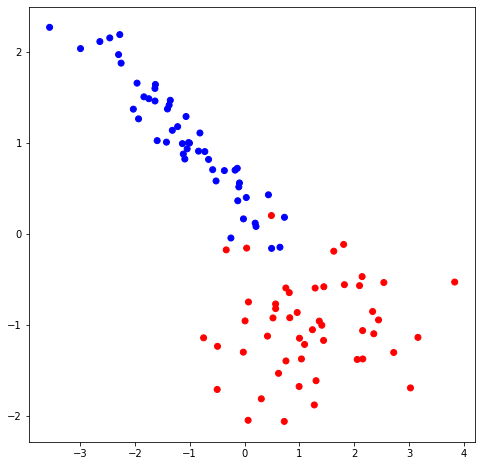

In [4]:
X0 = data[:, 0]
X1 = data[:, 1]

colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter(X0, X1, c = target, cmap = colors);

Итак, теперь данные мы сгенерировали, нам остается разбить их на обучение и тест (с помощью функции train_test_split).

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(data, 
                                    target, test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

В качестве модели классификаций будем использовать **SGDClassifier** — это линейная классификация, работающая на основе стохастического градиентого спуска. В качестве функции потерь будем использовать *log loss* — нам это нужно для того, чтобы наш классификатор получился вероятностным. Для некоторых метрик мы захотим использовать вероятности принадлежности объектов к нашим классам, поэтому нам нужен вероятностный классификатор.

In [6]:
# Определяем классификатор (модель классификаци)
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1)

In [7]:
# С помощью метода fit обучим классификатор 
classifier.fit(train_data, train_labels)

SGDClassifier(loss='log', random_state=1)

In [8]:
# С помощью метода predict сгенерируем предсказания в виде меток классов  
predictions = classifier.predict(test_data)

In [9]:
# С помощью метода predict_proba сгенерируем предсказание в виде вероятности 
# принадлежности объекта к нулевому и первому классу. 
# На вход передаем наши тестовые данные.
probability_predictions = classifier.predict_proba(test_data)

In [10]:
# Выведем на экран правильные метки и предсказания в виде меток
print(test_labels)
print(predictions)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]
[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0]


Видно, что мы немножечко ошибаемся в нескольких местах.

In [11]:
# Добавим настройку для удобного чтения значений
import numpy as np
np.set_printoptions(suppress=True)

# Выведем на экран предсказания в виде 
# вероятности принадлежности к обоим классам
print(probability_predictions)

[[0.         1.        ]
 [1.         0.        ]
 [0.99999098 0.00000902]
 [0.         1.        ]
 [1.         0.        ]
 [0.00000052 0.99999948]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.9999997  0.0000003 ]
 [0.00406374 0.99593626]
 [0.         1.        ]
 [0.00000001 0.99999999]
 [1.         0.        ]
 [0.9966812  0.0033188 ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.99999973 0.00000027]
 [0.89750603 0.10249397]
 [1.         0.        ]
 [0.9999995  0.0000005 ]
 [0.99475148 0.00524852]
 [0.58329162 0.41670838]
 [0.         1.        ]
 [0.03200942 0.96799058]
 [1.         0.        ]]


Помните, что первое значение — это вероятность принадлежать к нулевому классу, второе значение — вероятность принадлежать к первому классу. 

#### accuracy

Первая метрика, на которую мы посмотрим — это accuracy. Эта метрика соответствует доле правильно классифицированных объектов. Понятно, что метрика довольно простая, поэтому ее реализацию мы можем написать самостоятельно — достаточно просто сравнить правильную метку и метку, которую мы предсказываем. Дальше посчитать, сколько, в скольких случаях мы предсказываем метку правильно, и поделить это на объем данных. Мы получаем оценку — 0,93. 

In [12]:
sum([1. if pair[0] == pair[1] else 0. 
     for pair in zip(test_labels, predictions)])/len(test_labels)

0.9333333333333333

Воспользуемся готовой реализацией метрики *accuracy* — функция называется **accuracy_score**. В качестве аргументов передаем ей предсказанные нашим классификатором метки и правильные метки. Видим, что наши оценки совпали. 

In [13]:
metrics.accuracy_score(test_labels, predictions)

0.9333333333333333

#### confusion matrix

Следующий объект, про который необходим для анадлиза точности классификации — confusion matrix — это матрица, размером количество классов на количество классов. **В позиции *i* и *j* у нас стоит элемент, который характеризует количество объектов, которые изначально имели метку *i*, но мы им поставили метку *j*.** Таким образом, на диагонали у нас — элементы, характеризующие объекты, на которых мы ответили правильно, вне диагонали у нас — элементы, характеризующие количество объектов, на которых мы ошиблись. Давайте построим такую матрицу и выведем ее на экран. Она строится с помощью метода **confusion_matrix**. Также на вход мы передаем правильные метки классов и предсказанные метки. 

In [14]:
matrix = metrics.confusion_matrix(test_labels, predictions)
print(matrix)

[[17  1]
 [ 1 11]]


Видим, что довольно неплохо мы отработали. На диагонали видим значения 17 и 11, то есть, ну, мы ошибаемся не так часто. Теперь давайте проверим, так ли это. Мы можем снова просуммировать объекты, на которых наша метка совпадает с предсказанной — это делается довольно просто. 

In [15]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(test_labels, predictions)])

28

Получили 28 объектов. Теперь если мы сложим диагональные объекты на нашей матрице, мы тоже получили 28. Таким образом, понятно, что если сложить диагональные элементы, мы найдем количество объектов, на которых мы ответили правильно.

In [16]:
matrix.diagonal().sum()

28

*Confusion_matrix* очень полезна тем, что на ее основе можно рассчитывать такие метрики, как точность, полнота и f-меры.

#### precision 

Для начала давайте оценим точность классификации. Так как мы решаем задачу бинарной классификации, мы можем отдельно оценить точность при отнесении объектов к нулевому классу и точность при отнесении объектов к первому классу. Для того чтобы оценить точность классификации к нулевому классу, нам нужно вызвать функцию **precision_score**, передать ей правильные метки классов, передать предсказанные метки классов. И так как по умолчанию наш *label* равен 1, то нам нужно явно сказать, что в данном случае мы оцениваем точность классификации к нулевому классу. Для этого используем аргумент *pos_label* и говорим, что он равен 0.

In [17]:
metrics.precision_score(test_labels, predictions, pos_label = 0)

0.9444444444444444

Итак, видим, что мы получили 0,94 (=17/(17+1)). Теперь давайте оценим точность классификации объектов к первому классу. Мы получили 0,91 (=11/(11+1)). Ну, по нашей матрице понятно, почему точность при классификации к нулевому классу получилась больше.

In [18]:
metrics.precision_score(test_labels, predictions)

0.9166666666666666

#### recall

Теперь давайте оценим полноту. Это делается с помощью метода **recall_score**, а аргументы такие же. Сначала оцениваем полноту для нулевого класса, получаем 0,94. И теперь давайте посмотрим на первый класс — 0,91. 

In [19]:
metrics.recall_score(test_labels, predictions, pos_label = 0)

0.9444444444444444

In [20]:
metrics.recall_score(test_labels, predictions)

0.9166666666666666

#### f1

Имея оценки для *precision* и *recall* (для точности и полноты), легко получить оценки для f-меры. Давайте сначала оценим f-меру для нулевого класса, а потом — для первого. 

In [21]:
metrics.f1_score(test_labels, predictions, pos_label = 0)

0.9444444444444444

In [22]:
metrics.f1_score(test_labels, predictions)

0.9166666666666666

#### classification report

Часто, когда мы решаем задачу классификации, нам интересно смотреть на все эти метрики: на *precision*, *recall*, f-меру. Причем нам интересны как значения в разрезе классов, так и значения в среднем. Для того чтобы получить такую мини-сводку по нашей модели, удобно использовать функцию под названием *classification_report*. 

In [23]:
print(metrics.classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Для ее работы достаточно передать ей метки класса и предсказанные метки класса. Результатом работы функции будет табличка, в которой представлно качество модели в разрезе классов: precision, recall, f-score. Также видим, сколько изначально объектов было разных классов, и видим некоторые усреднения внизу — довольно удобно.

#### ROC curve

Следующая метрика — это ROC-curve и ROC — AUC. Для построения ROC-curve мы сначала сортируем наши объекты по предсказанной величине, потом делим их на несколько групп по некоторым пороговым отсечениям и внутри каждой группы оцениваем True Positive Rate и False Positive Rate. Далее, когда мы таким образом получаем списки True Positive Rate и False Positive Rate, мы можем построить нашу ROC-кривую. Просто строим кривую в этих координатах. Итак, для того чтобы получить списки False Positive Rate, True Positive Rate и thresholds, нам нужно вызвать функцию **roc_curve**. Она принимает на вход правильные метки классов и наши ответы на этих классах. Нам интересней в данном случае воспользоваться вероятностными ответами, потому что здесь у нас задан более точный порядок. Поэтому давайте передадим в качестве второго аргумента *probability_predictions* — наши вероятностные предсказания. Мы с вами будем использовать вероятности отнесения объектов к первому классу, поэтому вот мы говорим, что берем все объекты, и так как, вы помните, там список из двух элементов, берем элемент с индексом 1 — это вероятность принадлежать к первому классу.

In [24]:
fpr, tpr, _ = metrics.roc_curve(test_labels, probability_predictions[:,1])

Запускаем функцию, получили три аргумента. False Positive Rates и True Positive Rates нам нужны непосредственно для построения ROC-кривой, ну и понятно, что трешхолды нам для построения ROC-кривой не нужны, поэтому давайте будем здесь использовать нижнее подчеркивание, явно говоря о том, что это возвращаемое значение мы использовать не собираемся. Теперь у нас есть все данные для построения ROC-кривой. Построим ее с помощью метода plot. Передаем в качестве x-координат *False Positive Rates*, в качестве y-координат — *True Positive Rate*, и назовем нашу кривую linear model, линейная модель. Теперь давайте для сравнения построим ROC-кривую, соответствующую случайной классификации, — это просто диагональная прямая, назовем ее random. Создадим границы для оси x и оси y с помощью *xlim* и *ylim*. Далее, давайте зададим названия для наших осей и зададим имя графика. Также мы отрисуем легенду — подпись к каждой кривой, она будет находиться справа внизу.

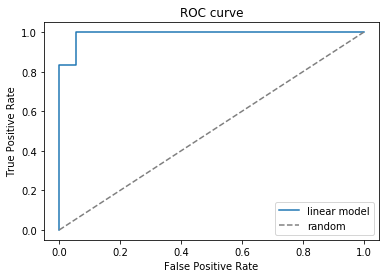

In [25]:
# Передаем в качестве x-координат FPR, в качестве y-координат — TPR
plt.plot(fpr, tpr, label='linear model') # назовем нашу кривую linear model
plt.plot([0, 1], [0, 1], '--', color='grey', label='random') # манжетка
plt.xlim([-0.05, 1.05]) # создадим границы для оси x с помощью xlim
plt.ylim([-0.05, 1.05]) # создадим границы для оси y с помощью ylim
plt.xlabel('False Positive Rate') # зададим названия оси x
plt.ylabel('True Positive Rate')  # зададим названия оси y
plt.title('ROC curve')            # зададим имя графика
plt.legend(loc = "lower right")   # определим положение легенды

#### ROC AUC

Теперь, для того чтобы количественно оценить качество модели, нам с вами нужно посчитать площадь под ROC-кривой. Такая метрика называется ROC — AUC, и строится она с помощью метода **roc_auc_score**. Понятно, что в данном случае мы снова можем передать в качестве аргументов как предсказания в виде меток, так и предсказания в виде вероятностей. Хочется понять, получатся ли они одинаковые или разные, но интуитивно кажется, что они должны быть близки — действительно, это же классификация с помощью одной и той же модели.

In [26]:
metrics.roc_auc_score(test_labels, predictions)

0.9305555555555554

In [27]:
metrics.roc_auc_score(test_labels, probability_predictions[:,1])

0.9907407407407407

Но понятно, что когда мы с вами имеем дело с метками, то в этом случае порядок следования объектов несколько более свободный, ну то есть те объекты, которые имеют одинаковую метку, могут идти в произвольном порядке. Случай, когда мы работаем с вероятностной классификацией, наш порядок задан более строго. Вот давайте сравним AUC в обоих случаях. Запускаем и видим, что, действительно, он у нас значительно отличается. Ну такое бывает из-за того, что в первом случае у нас действительно объекты могут в рамках группы идти в произвольном порядке. Это нормально. 

#### PR AUC

Следующая метрика — это average_precision_score или presicion AUC. Для того чтобы ее посчитать, нужно вызвать функцию **average_precision_score**, и также передаем ей правильные метки и наши предсказания. 

In [28]:
metrics.average_precision_score(test_labels, predictions)

0.873611111111111

#### log_loss

И для оценки вероятностных классификаторов часто используется метрика **log_loss**, или логистические потери. В данном случае мы уже не можем передать ей метки класса, мы должны передать вероятности принадлежности к первому классу. Давайте запустим эту метрику и посмотрим. 

In [29]:
metrics.log_loss(test_labels, probability_predictions[:,1])

0.21767621111290084

Видим, что log_loss довольно небольшой — 0,22 — очень неплохая оценка. Ну, вы помните, что log_loss — чем меньше эта метрика, тем лучше. В идеальном случае мы должны получить 0.